<a href="https://colab.research.google.com/github/KrisSo03/proycalckris/blob/main/proycalckris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Estudiante: Kristhel Porras Mata
* Curso: Cálculo empresarial aplicado a la ciencia de datos
* Asignación: proyecto final
* Docentes: Jorge Zapata y Bernal Rojas
*Fecha de entrega: 02/09/2023


# Resumen
En este documento se busca poner en práctica lo aprendido durante el curso de cálculo aplicado a la ciencia de datos. Para esto se hará enfoque en temas como la regresión lineal, derivación, integración, suma de Riemann y descenso de gradiente. Dichas técnicas se aplicarán por medio de Python a un conjunto de datos generados aleatoriamente.

#  Introducción
En la actualidad una forma de agregar valor en los diferentes sectores como el financiero es a través de cosas como la aplicación asertiva del cálculo. Ante esta realidad, la ciencia de datos ofrece soluciones que recurren a la economía de tiempo por medio de programación para llevar a cabo tareas de acuerdo a la necesidad.

En este proyecto se busca hacer uso de la regresión lineal, suma de Riemann, descenso de gradiente, al igual que la derivación por medio de la codificación en Python. El objetivo es demostrar el nivel de sencillez que puede representar analizar conceptos de economía a partir de la aplicación de estos métodos a un dataframe, que en este caso es generado aleatoriamente.
Sin embargo, antes es importante hacer mención a las definiciones matemáticas que se deberá comprender para efectos de este trabajo, al igual que el uso que se les dará.

Un concepto importante a tener en cuenta es el de regresión lineal: “Es una técnica de análisis de datos que predice el valor de datos desconocidos mediante el uso de otro valor de datos relacionado y conocido”(Amazon Web Services,2023). Entonces,  este se utilizará para modelar la relación entre el precio del producto y la cantidad que se solicita de acuerdo al mercado.
Si bien se conoce gracias a Larson y Edwards (2014,p.99) que la derivada se define por:
\begin{equation}
\displaystyle
\lim_{{\Delta x \to 0}} \frac{f(x + \Delta x) - f(x)}{\Delta x}
\end{equation}
La derivación se va a utilizar para ver la cantidad de demanda y oferta según el precio.

Por otro lado, los mismos autores (2014,p.264) indican que la suma de Riemann se define como:
\begin{equation}
\displaystyle
\sum_{i=1}^{n} f(c_i) \Delta x_i, \quad x_{i-1} \leq c_i \leq x_i
\end{equation}

La fórmula anterior se usará para estimar el área bajo la curva de las funciones de demanda y oferta respecto al precio.
Finalmente, el descenso de gradiente, que según International Business Machines Corporation (s.f) es un “algoritmo de optimización que se usa comúnmente para entrenar modelos de machine learning y redes neuronales”. Esto va a ayudar a encontrar el precio óptimo para obtener mayores ganancias.

# Código y análisis

In [ ]:
#Librerías y otros recursos
import pandas as pd
import numpy as np
import seaborn as sns
from seaborn.regression import regplot
import matplotlib.pyplot as plt

#help(pd)


Comentario: la línea help(nombre del paquete.función) se usó para ver propiedades que se podrían aplicar en el proyecto

In [ ]:
#Paso 1: generar datos aleatorios para el valor del producto, disponibilidad y demanda cada 2 semanas desde que se inició el negocio hasta la última fecha en la que se entregó mercadería.

##Fechas para un período de 3 meses
fecha_inicio = "2023-01-26"
fecha_conclusion = "2023-08-26"

##Genera las fechas diariamente
rango_fechas = pd.date_range(fecha_inicio, fecha_conclusion, freq="2W") # Si quisiera que fuera bisemanal en lugar de "D" tendría que usar "2W"

##  Datos: precios, disponibilidad y demanda para cada día en el período
numero_dias = len(rango_fechas)
precio_promedio_dolares = 21
precios = np.random.normal(precio_promedio_dolares, 1.5, numero_dias) # este valor en medio del precio promedio y número de días es básicamente la variabilidad que quiero para los precios según el promedio para cada día
precios=np.round(precios,2)
factor_disponibilidad = 112
disponibilidad = factor_disponibilidad * np.random.rand(numero_dias)
disponibilidad= np.round(disponibilidad).astype(int)

## Función para generar demanda aleatoria para cada día en el período
def generar_demanda_4_meses(media_demanda, desviacion_demanda, numero_dias):
    demanda = np.random.normal(media_demanda, desviacion_demanda, numero_dias)
    demanda = np.maximum(demanda, 0) # El 0 es el valor mínimo, así no hay números negativos, pues existe la posibilidad que un día no se ocupe el producto
    return demanda

## Parámetros para la demanda
media_demanda_total = 75
desviacion_demanda_total = 15

## Obtener información para la demanda diaria
demanda_total = generar_demanda_4_meses(media_demanda_total, desviacion_demanda_total, numero_dias)
demanda_total= np.round(demanda_total).astype(int)

## Obtener el dataframe
datos = { "Fechas": rango_fechas,"Valor por unidad": precios, "Unidades disponibles": disponibilidad,"Unidades demandadas": demanda_total}
df = pd.DataFrame(datos)
df

Del bloque de código anterior logré obtenet la siguiente tabla de valores en la que se contempla por fecha el valor por unidad, la cantidad de unidades disponibles y las demandadas. Esta información va a ser la base para diversos análisis. Es muy importante tener en cuenta que estos son datos ficicios y que su única finalidad es evidenciar unas de las tantas aplicaciones del cálculo en la ciencia de datos.

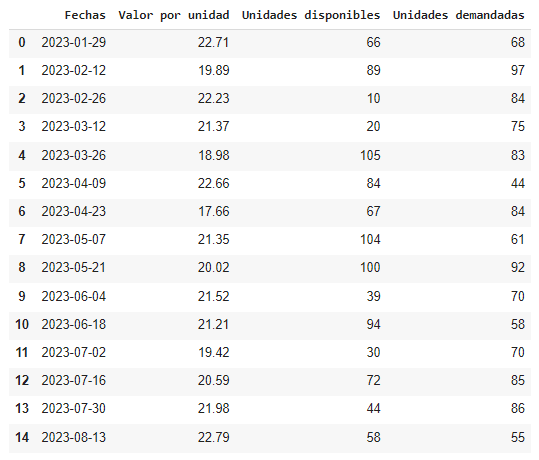

In [ ]:
#Paso 2: regresión lineal para conseguir las relaciones del precio con la demanda y disponibilidad
sns.lmplot(x= "Unidades disponibles", y="Valor por unidad", data=df) # esto es para la regresión entre precio y disponibilidad
plt.title ("Regresión entre precio y disponibilidad")

sns.lmplot(x= "Unidades demandadas", y="Valor por unidad", data=df)  # esto es para la regresión entre precio y demanda
plt.title ("Regresión entre precio y demanda")


En este segundo paso lo que se buscó es encontrar la regresión lineal de manera visual, esto se hizo en función del precio, por tanto existe la posibilidad que el comportamiento de tanto la disponibilidad y demanda tenga un comportamiento similar:

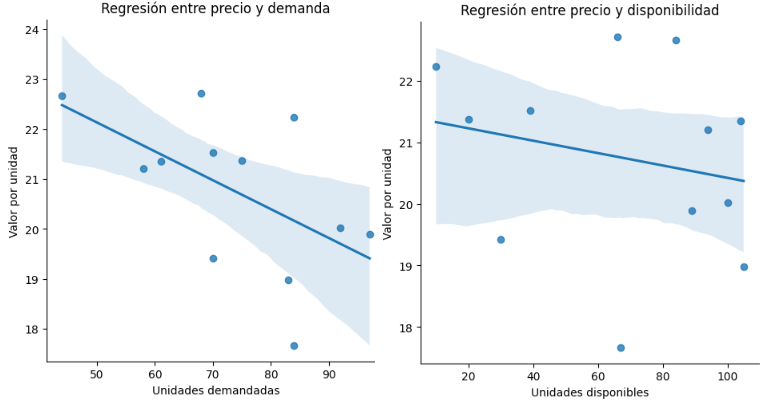

En las graficas anteriores se ve una relación débil de tipo negativa, por tanto se podría llegar a las siguientes conclusiones:
* La pendiente en la mayor parte de los casos no aumenta.
* La dispersión de los puntos indica la influencia de otros factores, ahora bien, en este caso no se han especificado, pero, en un caso real se puede interpretar como consecuencia de la inflación, competencia, entre otras cosas.
* La predicción de patrones va a ser más complicado, pues la relación no es constante ni pareja, lo cual significa que para lograr esto se tendría que recurrir a otros métodos.
* Los unidades disponibles son más constantes en comparación a los demandados.

In [ ]:
##Si quisiera saber el modelo que está usando seaborn puedo hacer lo siguiente:
###Para la disponibilidad:
modelo_disponibilidad= sns.regplot(x= "Unidades disponibles", y="Valor por unidad", data=df,label="Disponibilidad")
a_dispo=modelo_disponibilidad.get_lines()[0].get_data()[0][1]
b_dispo=modelo_disponibilidad.get_lines()[0].get_data()[1][0]

###Para la demanda
modelo_demanda= sns.regplot(x= "Unidades demandadas", y="Valor por unidad", data=df,label="Demanda")
a_demanda=modelo_demanda.get_lines()[0].get_data()[0][1]
b_demanda=modelo_demanda.get_lines()[0].get_data()[1][0]

print("Modelo de regresión para la disponibilidad es: y={:.2f}x+{:.2f}".format(a_dispo, b_dispo))
print("Modelo de regresión para la demanda es: y={:.2f}x+{:.2f}".format(a_demanda, b_demanda))

plt.title("Regresión lineal entre precio y disponibilidad/demanda")
plt.xlabel("Unidades disponibles/demandadas")
plt.ylabel("Valor por unidad")

plt.legend()
plt.show()

Al hacer uso de seaborn se obtiene los modelos de regresión usados para conseguir las gráficas. Ahora bien, es importante dimensionar cómo se ven ambas regresiones de manera conjunta:

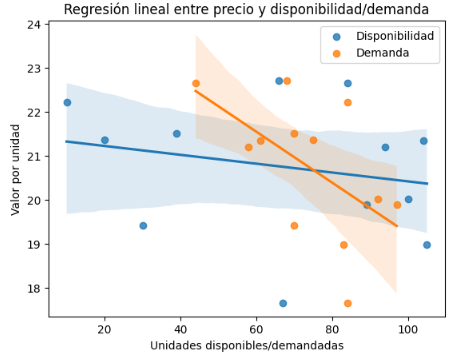

Del bloque anterior se llegó a la expresión:
\begin{equation}
\displaystyle
\ y=10.96x+21.33
\end{equation}
Esto es una recta en la que se tiene una pendiente de 10.96 y un intercepto en y de 21.33

In [ ]:
#Paso 3:uso del descenso de gradiente en base a una función de costos para llevar el precio a $25
tasa_aprendizaje = 0.01
iteraciones =100
valor_objetivo = 25 # la idea es que al aumentar 4 dólares el precio promedio el margen de beneficio va a ser mayor por ventas

##Obtener el valor promedio actual para iniciar el proceso
valor_promedio_actual= np.mean(df["Valor por unidad"])

##Fucnión
def funcion(valor_promedio_actual,valor_objetivo):
  return (valor_promedio_actual-valor_objetivo)**2

##Descenso de gradiente
for iteracion in range (iteraciones):
  gradiente= 2*(valor_promedio_actual-valor_objetivo)
  valor_promedio_actual= valor_promedio_actual-tasa_aprendizaje*gradiente
  costo_actual= funcion(valor_promedio_actual, valor_objetivo)

valor_promedio_actual

El descenso de gradiente se usó en su forma más sencilla porque lo único que busqué es conseguir un precio óptimo. Ahora bien, si se diera otro enfoque perfectamente se podría usar sklearn para aplicar el método estocástico. Pero, volviendo al resultado obtenido, se sabe que si el producto se vende a $24.44 el margen de beneficio va a ser mayor según la cantidad de ventas lo cuál puede ser materia para otro análisis.

In [ ]:
#Paso 4 : usar la derivación para identificar las tasas de cambio con repspecto al precio
##Ordenar el dataframe
df.sort_values(by="Fechas", inplace=True)
df_copia=df.copy()

##Tasa de cambio de la disponibilidad con respecto al precio
df_copia["Tasa de cambio disponibilidad"] = df_copia["Unidades disponibles"].diff().shift(-1)/df["Valor por unidad"].diff().shift(-1)

##Tasa de cambio de la demanda con respecto al precio
df_copia["Tasa de cambio demanda"] = df_copia["Unidades demandadas"].diff().shift(-1)/df["Valor por unidad"].diff().shift(-1)

##Eliminar valores nulos
df_copia= df_copia[:-1]
print(df_copia)


       Fechas  Valor por unidad  Unidades disponibles  Unidades demandadas  \
0  2023-01-29             22.71                    66                   68   
1  2023-02-12             19.89                    89                   97   
2  2023-02-26             22.23                    10                   84   
3  2023-03-12             21.37                    20                   75   
4  2023-03-26             18.98                   105                   83   
5  2023-04-09             22.66                    84                   44   
6  2023-04-23             17.66                    67                   84   
7  2023-05-07             21.35                   104                   61   
8  2023-05-21             20.02                   100                   92   
9  2023-06-04             21.52                    39                   70   
10 2023-06-18             21.21                    94                   58   

    Tasa de cambio disponibilidad  Tasa de cambio demanda  
0  

En este paso 4 los resultados son mayormente números negativos lo cuál hace sentido si se revisa nuevamente la regresión lineal.
Para la tasa de cambio de la disponibilidad los valores negativos podrían representar que las unidades disponibles disminuyen cuando el precio aumenta. Esto mismo aplica para la demanda.

In [ ]:
#Paso 5: usar la suma de Riemann para averiguar el aumento de las unidadesd disponibles y demandadas a lo largo del periodo definido (01/26/2023-08/26/2023)
num_dias = len(df_copia)

##Definir el tiempo:
tiempo = np.arange(num_dias)

##Aplicación de Riemann al dataframe según el tiempo
def suma_Riemann(data, tiempo):
    suma_Riemann = 0
    for i in range(1, len(tiempo)):
        delta_t = tiempo[i] - tiempo[i-1]
        valor_promedio = (data[i] + data[i-1]) / 2
        suma_Riemann += valor_promedio * delta_t
    return suma_Riemann

## Riemann para las "Unidades disponibles"
suma_unidades_disponibles = suma_Riemann(df["Unidades disponibles"].values, tiempo)
## Riemann para las "Unidades demandadas"
suma_unidades_demandadas = suma_Riemann(df["Unidades demandadas"].values, tiempo)

print("Suma acumulada de las Unidades disponibles:", suma_unidades_disponibles)
print("Suma acumulada de las Unidades demandadas:", suma_unidades_demandadas)

Suma acumulada de las Unidades disponibles: 698.0
Suma acumulada de las Unidades demandadas: 753.0


Con la suma de Riemann logré identificar que en el periodo de 01/26/2023 hasta 08/26/2023 hubo un aumento de 698 unidades disponibles y otro de 753 para las demandas.

# Conclusión
En este pequeño proyecto se logró demostrar como el cálculo puede ser una herramienta en para las finanzas y economía, siendo la venta de un producto una buena oportunidad para practicar. Asimismo, cabe resaltar que en un escenario real teniendo un contexto establecido y acceso a data histórica se podría hacer cosas como predicciones para la toma de desiciones a futuro.